# <center> Ear Recognition Challenge - Xception </center>

In [2]:
import os
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
from keras.applications.xception import Xception

Using TensorFlow backend.


## Architecture

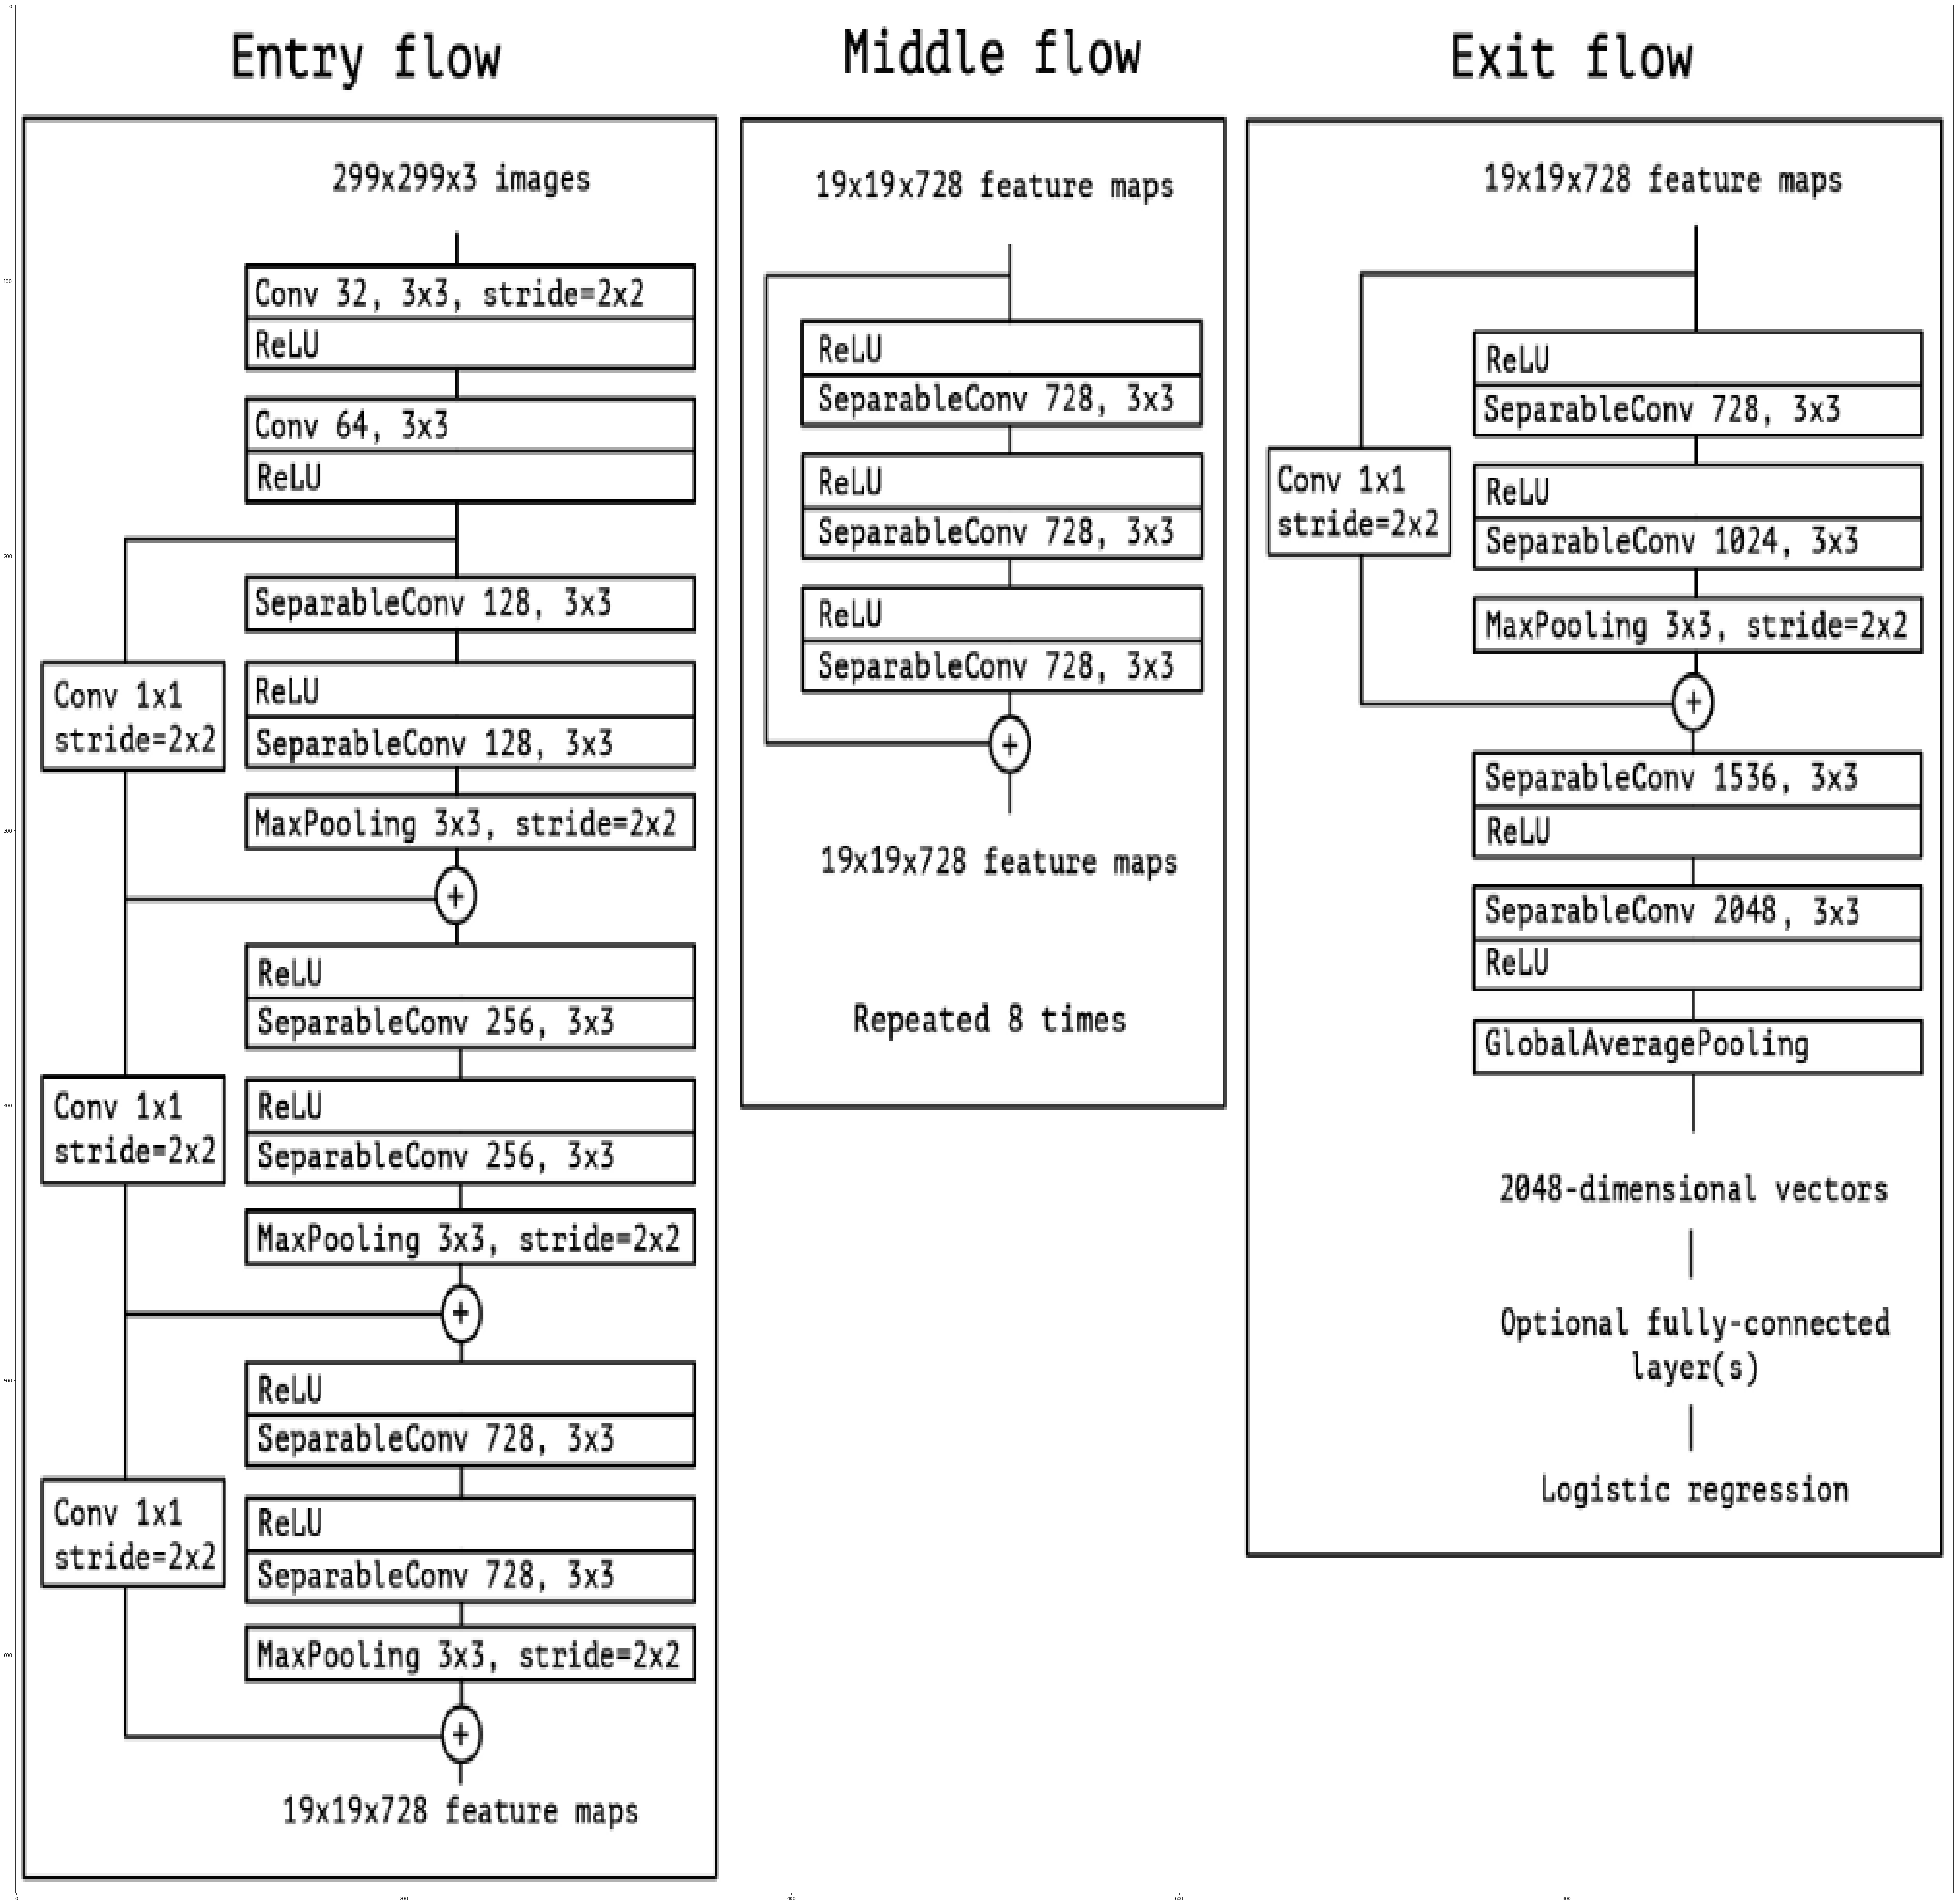

In [6]:
a = plt.imread('Xception archi.png')
plt.figure(figsize=(75,75))
plt.imshow(a,interpolation='nearest',aspect='auto')
plt.show()

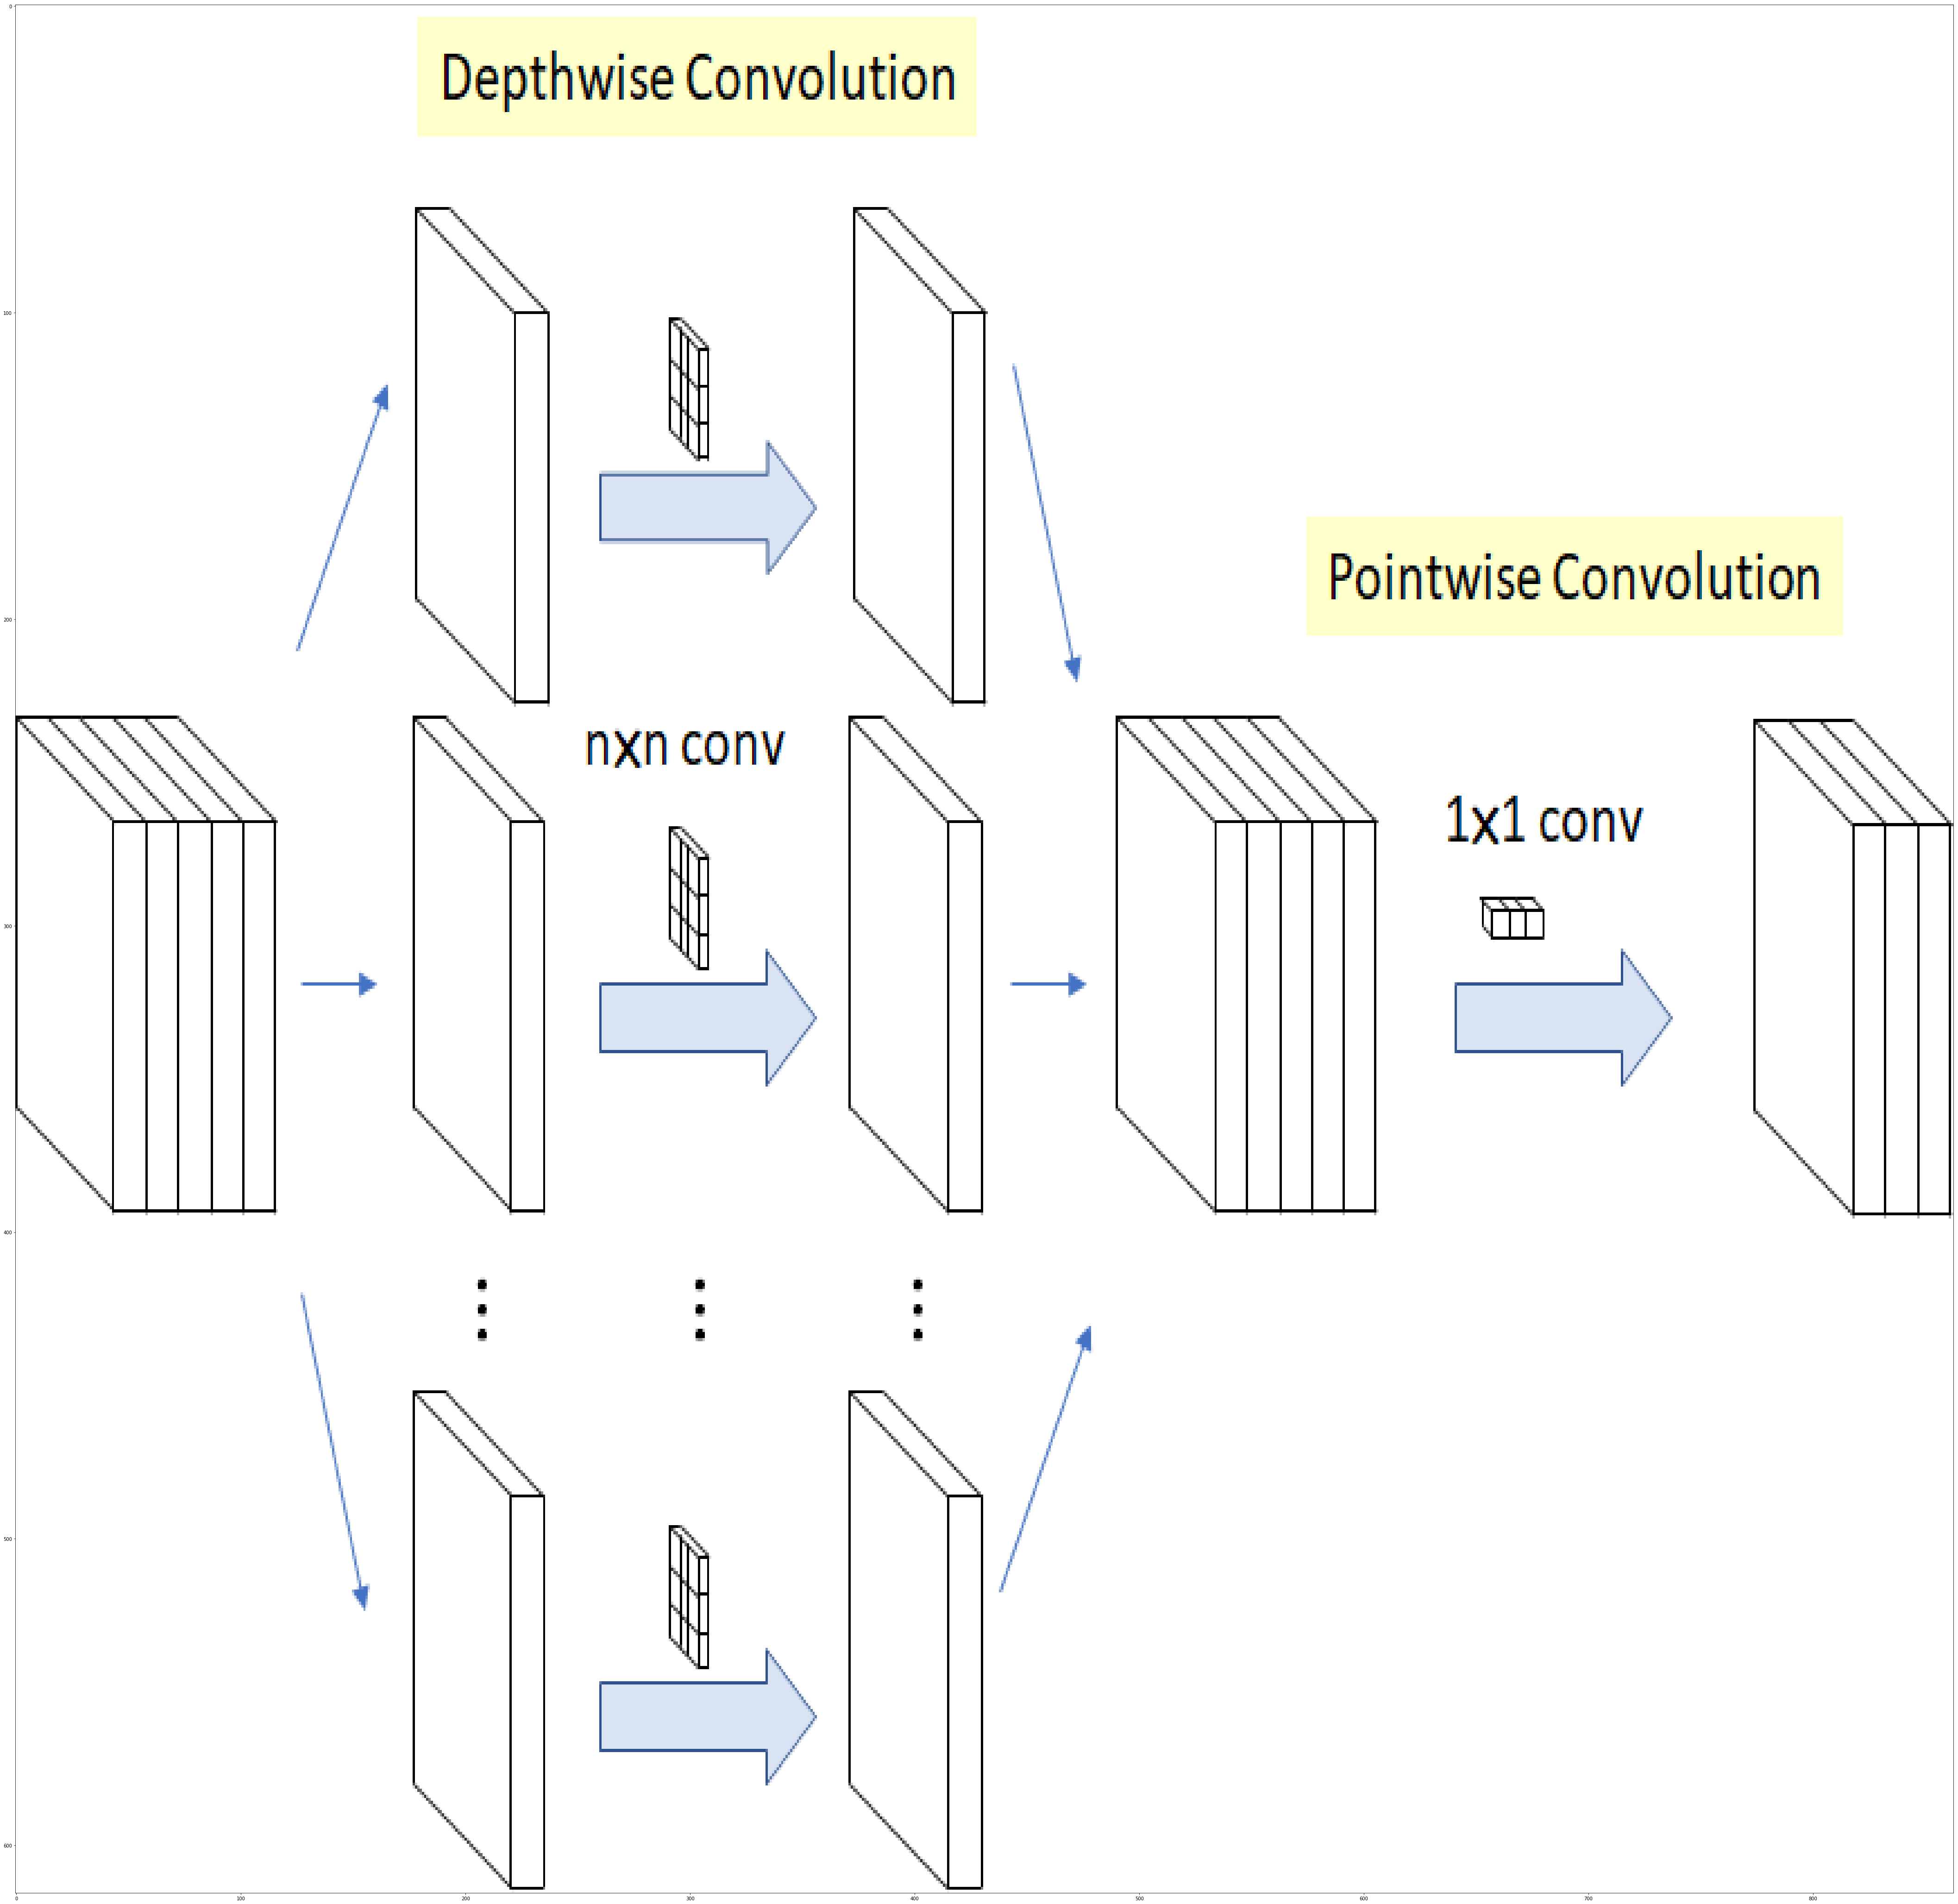

In [7]:
a = plt.imread('Seperable convolution.png')
plt.figure(figsize=(75,75))
plt.imshow(a,interpolation='nearest',aspect='auto')
plt.show()

In [3]:
PATH = 'Dataset/'

### Reading dataset

In [4]:
def dataset(mode):
    
    total_images = []
    label=[]
    mode_path = os.path.join(PATH,mode)
    subjects = os.listdir(mode_path)

    for subject in subjects:
        image_path  = os.path.join(mode_path,subject)
        images = os.listdir(image_path)
        for image in images:
            if(image.endswith(".png")):
                file = os.path.join(image_path,image)
                total_images.append(cv2.resize(cv2.imread(file),(100,100)))
                label.append(int(subject))
    total_images = np.array(total_images)
    label = np.array(label)
    return total_images , label

In [5]:
train,label = dataset('Train Dataset/')

### Splitting data

In [6]:
def split_data(data,label,valid_len):
    valid_len = int(valid_len*len(data)/100)
    return (data[0:len(data)-valid_len],label[0:len(data)-valid_len],
            data[len(data)-valid_len:len(data)],label[len(data)-valid_len:len(data)])

In [7]:
x_train,y_train,x_valid,y_valid = split_data(train,label,20)

In [8]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1844, 100, 100, 3)
(460, 100, 100, 3)
(1844,)
(460,)


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 1000)
y_valid = keras.utils.to_categorical(y_valid, 1000)

## Data Augmentation:

In [10]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Crop(percent=(0, 0.1)),
    iaa.GaussianBlur(sigma=(0, 3.0)),
    iaa.AdditiveGaussianNoise(scale=(0.0, 0.2)),
    # Improve or worsen the contrast of images.
    iaa.ContrastNormalization(0.5, per_channel=0.5),
    iaa.Multiply((0.8,1.2)),
    iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8,1.2)},
            rotate=(-45, 45)
        )
    
])

In [11]:
aug_img = seq.augment_images(x_train)

In [12]:
model = Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=x_train[0].shape, pooling=None, classes=1000)

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit_generator(datagen.flow(x_train,y_train, batch_size=70),verbose=1,validation_data=(x_valid,y_valid))

Epoch 1/1
